# Predicting Mobile Phone Price Range based on Technical Specifications

The modern mobile phone market is characterized by a myriad of devices featuring various technical specifications that cater to a wide range of consumer preferences. These technical specifications often significantly influence the price of these devices. Understanding the relationship between a phone's technical specifications and its price range can provide valuable insights for manufacturers, retailers as well as consumers.

## Objective
The primary objective of this project is to develop a predictive model that can accurately classify mobile phones into distinct price ranges based on their technical specifications. The classification will be grounded on a dataset consisting of 2000 observations, each with 20 features representing different technical specifications and one target variable representing the price range.

## Dataset
The dataset for the project was obtained from Kaggle: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/

It has 2000 observations and contains the following features:

1. Battery Power (mAh)
1. Bluetooth Support (binary: 0/1)
1. Clock Speed (GHz)
1. Dual SIM Support (binary: 0/1)
1. Front Camera Megapixels
1. 4G Support (binary: 0/1)
1. Internal Memory (GB)
1. Mobile Depth (cm)
1. Mobile Weight (grams)
1. Number of Processor Cores
1. Primary Camera Megapixels
1. Pixel Resolution Height
1. Pixel Resolution Width
1. RAM (MB)
1. Screen Height (cm)
1. Screen Width (cm)
1. Talk Time (hours)
1. 3G Support (binary: 0/1)
1. Touch Screen (binary: 0/1)
1. WiFi Support (binary: 0/1)

## Target Variable

`price_range` column of the data, which corresponds to the categorical range (0/1/2/3) of price is to be predicted with the model.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Exploratory Data Analysis

In [5]:
train = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [13]:
# Let's take a peek at what unique values are available for price_range
train['price_range'].unique()

array([1, 2, 3, 0])

Text(0.5, 1.0, 'Distribution of Phones Across Price Ranges')

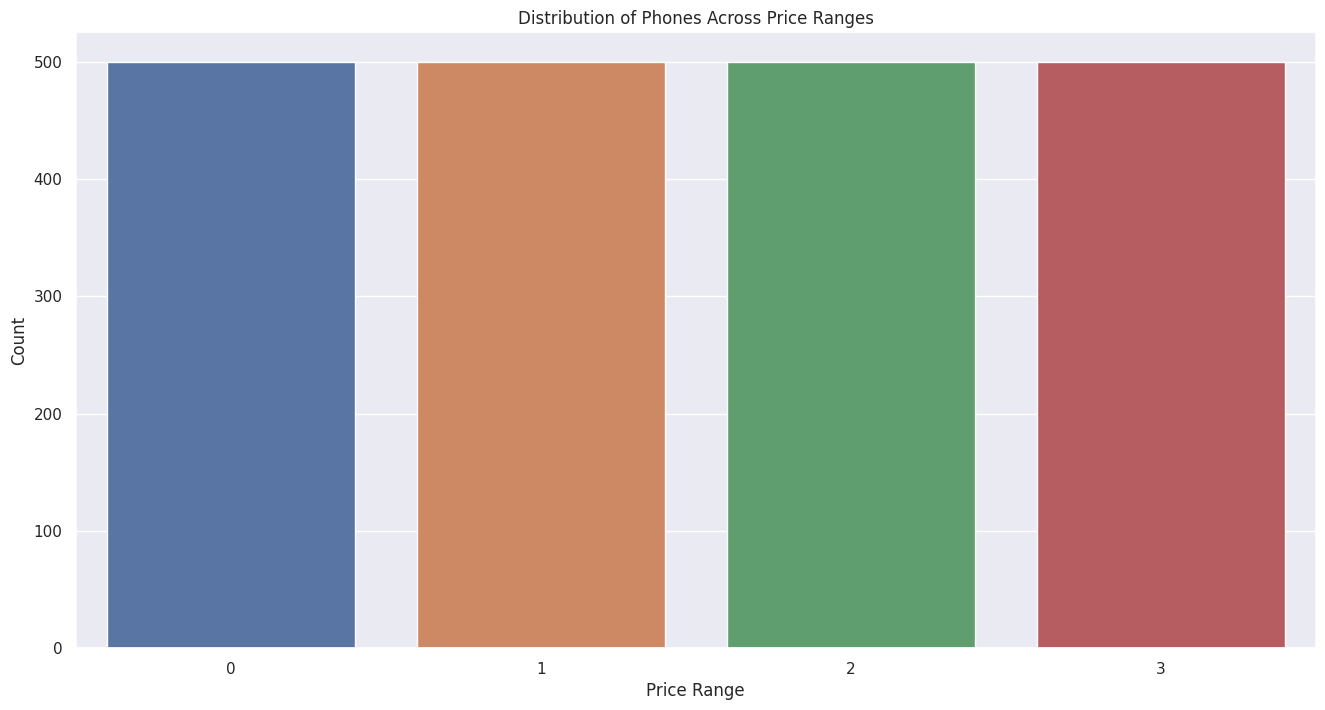

In [15]:
# Create a count plot for the price_range variable
sns.countplot(data=train, x='price_range')

# Labeling the axes and title
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Phones Across Price Ranges')

We can see the dataset has equal distribution of phones for each price range category.

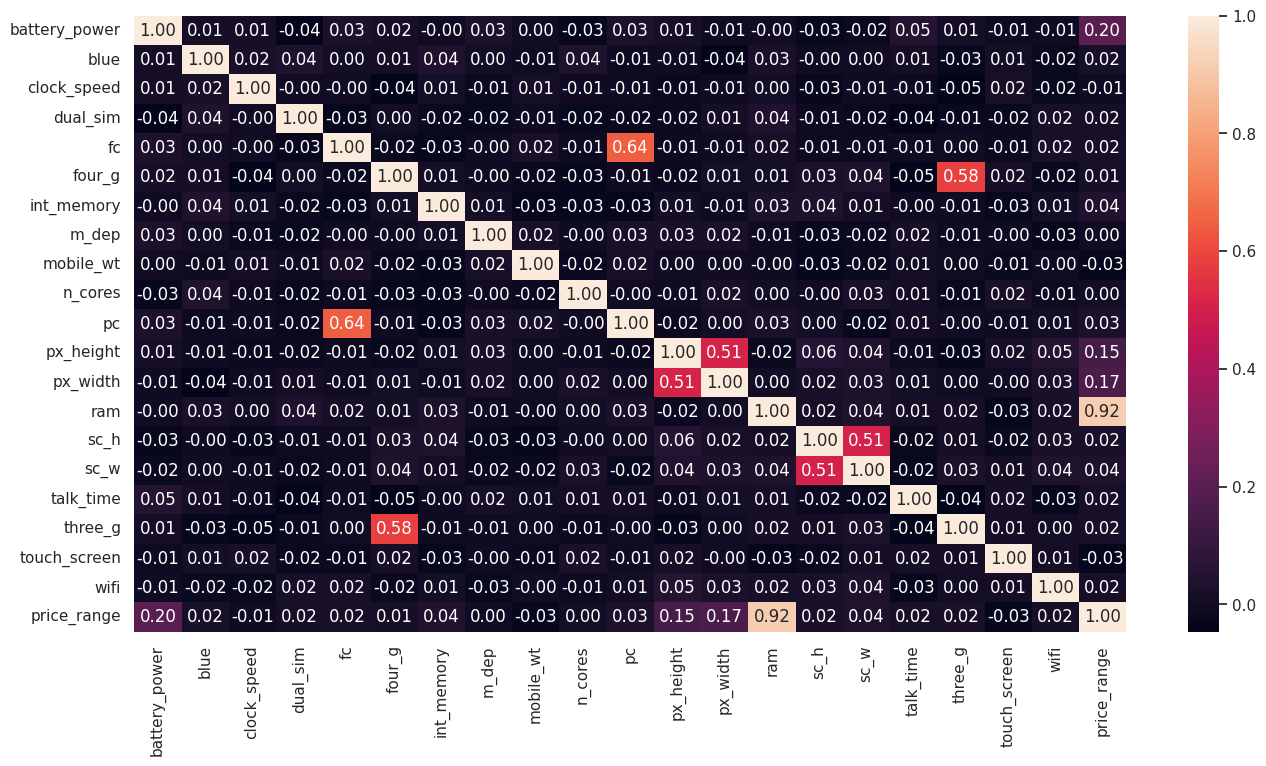

In [12]:
# Correlation matrix to understand linear relationships between numerical variables
correlation_matrix = train.corr()
sns.set (rc = {'figure.figsize':(16, 8)})
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

## Insights from Data Exploration

We can see the dataset has 2000 datapoints and 20 features that can be used to predict the target variable `price_range`.

`price_range` is categorical in nature with four unique values (0, 1, 2, 3) which correspond to incremental price range category.

From the plot of correlation matrix, we can find some interesting information. It appears like `price_range` is highly correleated to `ram` with a strong coefficient of 0.92. `battery_power`, `px_width` and `px_height` were also observed to be correleated to `price_range`.

This preliminary analysis not only underscores the pivotal role of `ram` in dictating the price range but also hints at the contributory relevance of `battery_power`, `px_width`, and `px_height` in the pricing schema, thereby providing a foundational understanding for the ensuing modeling phase.

# Data Cleaning and Feature Selection

The dataset utilized in this project was well-prepared and didn't necessitate any cleaning. It was free from missing, erroneous, or irrelevant data, which facilitated a smooth transition into the exploratory and modeling phases of the project.

However, its important to clean the dataset of unnecessary features. Feature selection was a pivotal step in this project to ensure the model's efficiency and interpretability. The objective was to identify the most influential features in predicting mobile phone price ranges. While the detailed process is illustrated in the following code cell, it's worth mentioning that this step aimed at reducing the model's complexity, improving performance, and providing insights into the factors significantly impacting mobile phone pricing. The significant features identified through this process are explored and utilized in the modeling phase, as demonstrated in the subsequent sections of this notebook.

<Axes: title={'center': 'P-values of Features'}, ylabel='p-value'>

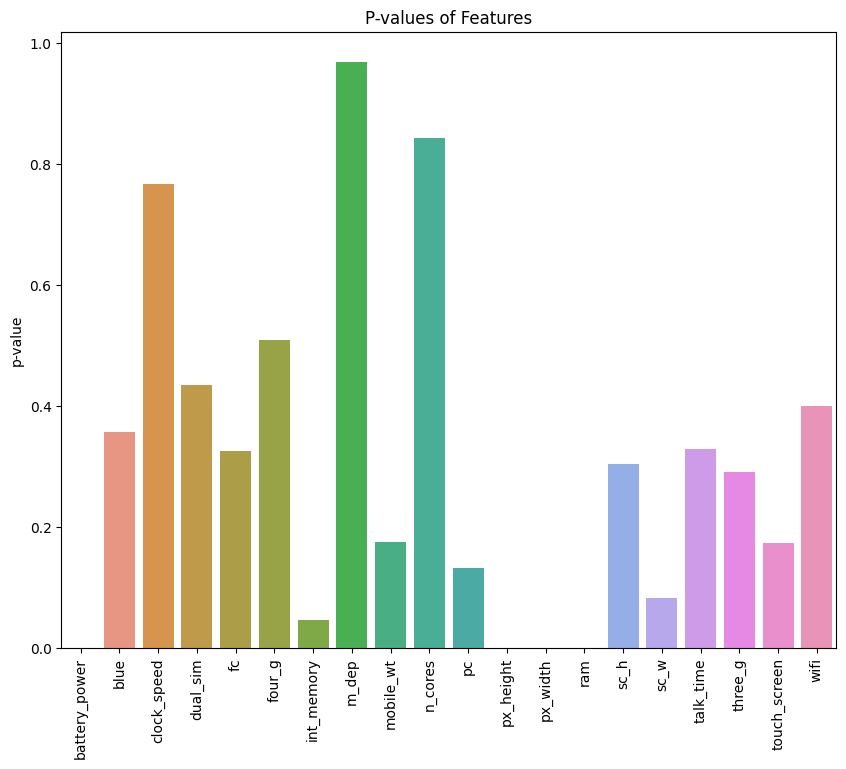

In [34]:
p_values_map = {}
for column in train.columns:
    if column == 'price_range': continue
    formula = f"price_range ~ {column}"
    model = smf.ols(formula=formula, data=train).fit()
    p_values_map[column] = model.pvalues[1] # ignoring the intercept p-value

p_values_series = pd.Series(p_values_map)
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
plt.ylabel('p-value')
plt.title('P-values of Features')
sns.barplot(x=p_values_series.index, y=p_values_series.values)

It is evident from the plot that majority of the features can be eliminated at a significance level of 0.05. In the following cell, I am going to filter through the features that contribute significantly ($ p < 0.05 $).

In [38]:
threshold = 0.05
significant_features = []
for column in p_values_map:
    if p_values_map[column] < threshold:
        significant_features.append(column)
significant_features

['battery_power', 'int_memory', 'px_height', 'px_width', 'ram']

It is found that the following features are significant in determining the price range of a phone:
1. Battery power
1. Internal Memory
1. PX Height (Screen Height)
1. PX Width (Screen Width)
1. RAM

This is very similar to the exploratory observation.

In [45]:
train_significant = train[['price_range', *significant_features]]
train_significant.head()

,price_range,battery_power,int_memory,px_height,px_width,ram
0,1,842,7,20,756,2549
1,2,1021,53,905,1988,2631
2,2,563,41,1263,1716,2603
3,2,615,10,1216,1786,2769
4,1,1821,44,1208,1212,1411


# Random Forest Classifier to predict Price Range

The Random Forest (RF) Classifier was chosen for this task due to its aptitude for handling multiclass classification problems, making it ideal for categorizing mobile phones into one of the four price ranges. Its ability to adeptly manage both categorical and numerical features minimizes the necessity for extensive preprocessing, streamlining the model development process.

## Addressing Multicollinearity

Before deploying the RF classifier, it was essential to address the potential issue of multicollinearity among features, as this could distort the model’s performance and interpretation. While RF is known for its resilience to multicollinearity, a preliminary examination was conducted to understand the inter-relationships among features. This understanding is instrumental for feature engineering and interpretation of the model.

In [55]:
# import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [56]:
# create a random forest classifier

X = train[significant_features]
y = train['price_range']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
# predict on validation data
y_pred = rf_classifier.predict(X_val)

In [58]:
# evaluate validation results

val_accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')

print(f'Accuracy of the Random Forest Classifier: {val_accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')

Accuracy of the Random Forest Classifier: 92.75%
Precision: 92.91%
Recall: 92.75%


## Off to a great start!

The initial model, implemented using the Random Forest Classifier, exhibits a commendable performance in predicting the price range of mobile phones based on various technical specifications. The accuracy of the model stands at 92.75%, indicating a high rate of correct predictions across the four price ranges. This accuracy score suggests a strong ability of the model to generalize and provide reliable predictions on the given dataset.

Furthermore, the precision of the model is recorded at 92.91%, which underscores the model's capability to accurately identify the correct price range while minimizing the instances of false positives. This high precision rate reflects the model's effectiveness in providing precise categorizations across the different price ranges.

Additionally, the model achieves a recall score of 92.75%, mirroring the accuracy. This score represents the model's proficiency in capturing a high proportion of positive cases across the distinct price ranges. The consistency between the recall and accuracy suggests a balanced model that is adept at both identifying relevant instances and minimizing incorrect predictions.

In summary, these metrics collectively portray a robust initial model that holds promise for accurately classifying mobile phones into distinct price ranges. The harmonized performance across accuracy, precision, and recall demonstrates a well-rounded model that serves as a solid baseline for any subsequent model tuning or comparisons.

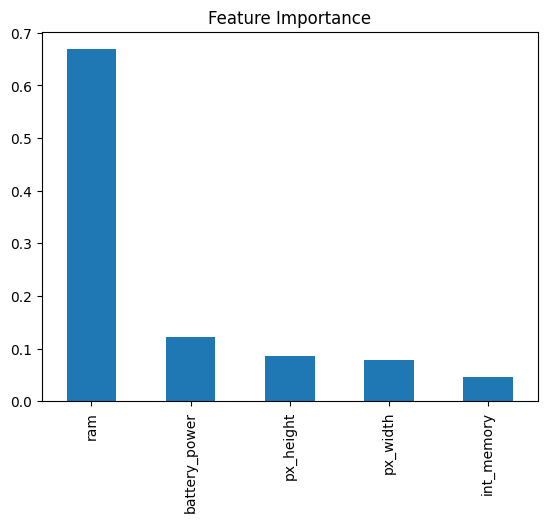

In [59]:
# figure out which features have most significant impact on the model

importances = rf_classifier.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)
feature_importances.sort_values(inplace=True, ascending=False)
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

From the plot, it is evident that RAM is the dominant feature in predicting the price range. This aligns with the common understanding, as higher RAM capacity often correleates with better performance and higher price.

It is more often that a phone with higher RAM would need more power to operate and would need a better battery. This also seems to align well in the plot.

In general, phones with better performance (RAM), longer battery life, higher resolution displays, and ample storage space (Internal Memory) meet the consumer’s desire for efficiency, convenience, and functionality, and often leads to higher price in the market. 

# Hyperparameter Tuning

The advancement of the optimization process was carried out by tuning key hyperparameters within the Random Forest classifier to boost its performance. A systematic grid search was executed in the subsequent code cell to meticulously explore a range of values for critical hyperparameters: 
1. the number of trees in the forest, 
1. the maximum depth of the trees, 
1. the minimum number of samples required for a node split, and 
1. the minimum number of samples required at a leaf node. 

This exploration was orchestrated across a 5-fold cross-validation framework, encapsulated in the next code cell, to ensure a robust evaluation across diverse data subsets. 

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

The identified optimal condiguration for the Random Forest Classifier includes **200 estimators**, **maximum tree depth of 10** and a **minimum of 5 samples required to split an internal node**.

In [69]:
best_pred = best_rf_classifier.predict(X_val)

val_accuracy = accuracy_score(y_val, best_pred)
precision = precision_score(y_val, best_pred, average='weighted')
recall = recall_score(y_val, best_pred, average='weighted')

print(f'Accuracy of the Best Classifier: {val_accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')

Accuracy of the Best Classifier: 93.25%
Precision: 93.40%
Recall: 93.25%


The best classifier demonstrates a slight increase in accuracy, precision and recall from the original model. 

# Cross Validation

In the following code cell, cross-validation is utilized to evaluate the models' performance. This technique partitions the data into five subsets, training on four and validating on one, iteratively. It provides a more thorough assessment compared to a single train-test split, helping to ensure that the models perform well across different data subsets. Both the initial (`rf_classifier`) and optimized (`best_rf_classifier`) Random Forest classifiers are evaluated using this method, offering a comparative insight into the improvements achieved through hyperparameter tuning.

In [61]:
from sklearn.model_selection import cross_val_score

# Using rf_classifier
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)
print(f'Mean CV Accuracy (rf_classifier): {cv_scores.mean() * 100:.2f}%')

# Using best_rf_classifier
cv_scores_tuned = cross_val_score(best_rf_classifier, X, y, cv=5)
print(f'Mean CV Accuracy (best_rf_classifier): {cv_scores_tuned.mean() * 100:.2f}%')


Mean CV Accuracy (rf_classifier): 91.05%
Mean CV Accuracy (best_rf_classifier): 91.40%
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] 

Following the cross-validation results, it's evident that the optimized Random Forest classifier (`best_rf_classifier`) demonstrates a slightly better mean cross-validation accuracy of 91.40% compared to the initial model (`rf_classifier`) with a mean accuracy of 91.05%. This improvement, although modest, indicates that the hyperparameter tuning process has contributed to enhancing the model's robustness and generalization performance across different subsets of the data.

# Results and Analysis

The Random Forest Classifier displayed a commendable performance in predicting mobile phone price ranges with an initial accuracy of 92.75%. Post hyperparameter tuning, the model exhibited a slightly enhanced accuracy of 93.25%, with a precision of 93.40% and recall of 93.25%. The model's robustness was further validated through cross-validation, yielding a mean accuracy of 91.4%, indicating a consistent performance across different subsets of the dataset.

## Evaluation Metrics

The model's performance was evaluated using additional metrics like precision and recall to provide a more nuanced understanding of its predictive capability. The high precision score of 93.40% suggests that the model has a high capability of correctly identifying the price range, while the recall of 93.25% indicates the model's ability to capture a high proportion of actual positive cases across all price ranges.

## Performance

The evaluation metrics, coupled with the feature importance analysis, painted a comprehensive picture of the model's performance. The high degree of precision and recall corroborates the model's reliability in accurately classifying mobile phones into appropriate price ranges. Furthermore, the consistency in performance as evidenced by cross-validation outlines the model's robustness and its potential for real-world applications. 

The insights derived from the feature importance plot and correlation heatmap are instrumental in understanding the key drivers affecting mobile phone pricing, thereby providing a solid foundation for making informed decisions in marketing and inventory management for mobile phone retailers.

# Conclusion

The project successfully developed and refined a Random Forest Classifier to predict mobile phone price ranges based on various technical specifications. The initial model demonstrated commendable performance with 92.75% accuracy score. Through a systematic process of feature importance analysis and hyperparameter tuning, the model was further optimized which improved its accuracy score to 93.25%.

The cross-validation results underscored the model's robustness and consistency across different subsets of data, with the optimized model exhibiting a mean CV accuracy of 91.40% as compared to the initial model's 91.05%.

The feature importance analysis also provided with insightful revelations on the critical factors influencing mobile phone price ranges, such as RAM and batter power, aligning with common consumer considerations.

Although the margin of improvement post tuning was modest, the efforts contributed to honing the model to be more reliable. The project lays a foundation for further exploration, possibly through experimenting with other machine learning models, diving deeper into feature engineering, or acquiring more data for training.